In [1]:
'''
4. Design and implement a CNN for Image Classification a) Select a suitable image classification 
dataset (medical imaging, agricultural, etc.). b) Optimized with different hyper-parameters including 
learning rate, filter size, no. of layers, optimizers, dropouts, etc.
'''
None

In [11]:
# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import cv2

In [3]:
# 2. Load and preprocess data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# PlantVillage dataset (agricultural images of healthy and diseased plants) — very popular and simple for classification tasks.
# (Or if you want faster execution, we can use CIFAR-10 dataset — tiny real-world images of 10 classes.)

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Data Loaded and Preprocessed")

Data Loaded and Preprocessed


In [4]:
# 3. Define CNN model with hyperparameters
def create_model(learning_rate=0.001, optimizer_type='adam', dropout_rate=0.5, num_filters=32):
    model = Sequential()
    
    # 1st Conv Block
    model.add(Conv2D(num_filters, (3,3), activation='relu', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2,2)))
    
    # 2nd Conv Block
    model.add(Conv2D(num_filters*2, (3,3), activation='relu'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10, activation='softmax'))  # 10 classes
    
    if optimizer_type == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
# 4. Create model with different hyperparameters
model = create_model(learning_rate=0.0005, optimizer_type='adam', dropout_rate=0.4, num_filters=64)

D:\Acadamics\Internship\iGurus\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# 5. Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
print("Model Training Done")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 37ms/step - accuracy: 0.2896 - loss: 1.9193 - val_accuracy: 0.5067 - val_loss: 1.4011
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4937 - loss: 1.4205 - val_accuracy: 0.5694 - val_loss: 1.2318
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5490 - loss: 1.2733 - val_accuracy: 0.6007 - val_loss: 1.1780
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.5906 - loss: 1.1640 - val_accuracy: 0.6195 - val_loss: 1.0876
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6178 - loss: 1.0847 - val_accuracy: 0.6531 - val_loss: 0.9943
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6398 - loss: 1.0291 - val_accuracy: 0.6529 - val_loss: 0.9905
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 43ms/step - accuracy: 0.6605 - loss: 0.9746 - val_accuracy: 0.6783 - val_loss: 0.9246
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.6735 - loss: 0.9291 - 

In [7]:
# 6. Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7000 - loss: 0.8696
Test Accuracy: 69.58%


In [8]:
# 7. Confusion Matrix and Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


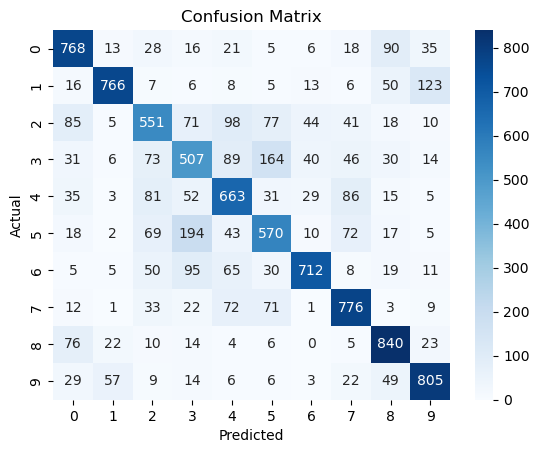

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1000
           1       0.87      0.77      0.81      1000
           2       0.60      0.55      0.58      1000
           3       0.51      0.51      0.51      1000
           4       0.62      0.66      0.64      1000
           5       0.59      0.57      0.58      1000
           6       0.83      0.71      0.77      1000
           7       0.72      0.78      0.75      1000
           8       0.74      0.84      0.79      1000
           9       0.77      0.81      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [9]:
cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(classification_report(y_true, y_pred_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


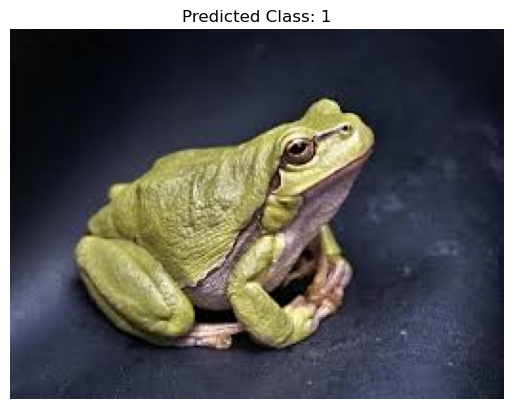

Predicted Class: 1


In [22]:
# 8. Image Classification - Manually classify an uploaded image
def classify_image(image_path):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    
    # Resize the image to match model's input size
    img_resized = cv2.resize(img, (32, 32))
    
    # Convert image to float32 and normalize
    img_resized = img_resized.astype('float32') / 255.0
    
    # Expand the dimensions to match model input (1, 32, 32, 3)
    img_resized = np.expand_dims(img_resized, axis=0)
    
    # Predict class
    predictions = model.predict(img_resized)
    predicted_class = np.argmax(predictions, axis=1)
    
    # Plot the image and prediction
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted Class: {predicted_class[0]}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_class[0]}")
    
# Example of classifying an image
image_path = 'frog.jpg'  # Replace with your image path
classify_image(image_path)

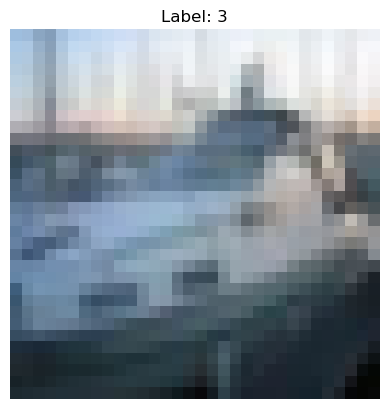

In [25]:
plt.imshow(X_test[2])  # X_test[0] is the first image
plt.title(f"Label: {np.argmax(y_test[0])}")  # Display the true label of the first image
plt.axis('off')  # Turn off axis
plt.show()